# Pandas & Linear Regression

* Explore a CSV dataset with pandas
* Data cleanup
* Plot dataframes
* Fit a line of best fit with linear regression

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib notebook

In [7]:
data = pd.read_csv('datasets/Ecdat/BudgetFood.csv')
data = data.drop('Unnamed: 0', axis=1)
data.head()

,wfood,totexp,age,size,town,sex
0,0.467699,1290941,43,5,2,man
1,0.313023,1277978,40,3,2,man
2,0.376482,845852,28,3,2,man
3,0.439691,527698,60,1,2,woman
4,0.403615,1103220,37,5,2,man


<IPython.core.display.Javascript object>


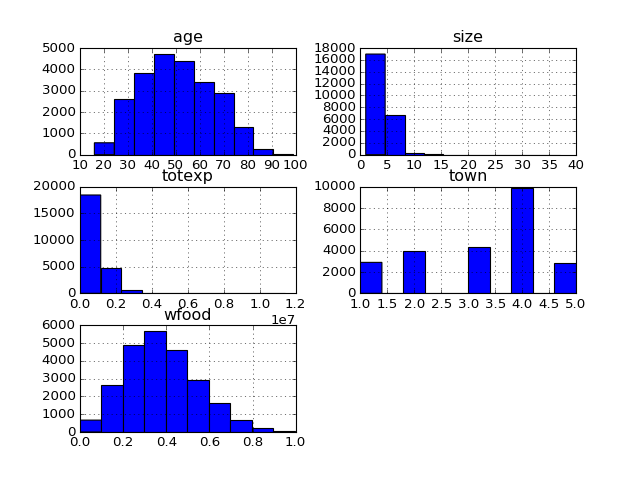

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fe2cb70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10fd683c8>]], dtype=object)

In [8]:
# View the distributions of your dataset as histograms
data.hist()

In [9]:
group = data.groupby(['sex', 'town'])
group = group.mean()
group = group.reset_index()
group

,sex,town,wfood,totexp,age,size
0,man,1,0.454967,680418.217048,55.003946,3.509077
1,man,2,0.418905,744950.155128,51.149382,3.909509
2,man,3,0.387849,860242.011722,48.097942,4.117739
3,man,4,0.342012,1024231.065375,47.286818,4.022584
4,man,5,0.322875,1113864.969877,47.741196,3.836657
5,woman,1,0.494984,389046.921409,66.539295,1.796748
6,woman,2,0.455007,477049.966337,64.403960,2.223762
7,woman,3,0.422003,495983.009560,60.804971,2.227533
8,woman,4,0.364472,627871.570456,57.400272,2.234173
9,woman,5,0.336294,665249.783784,53.767152,2.313929


<IPython.core.display.Javascript object>


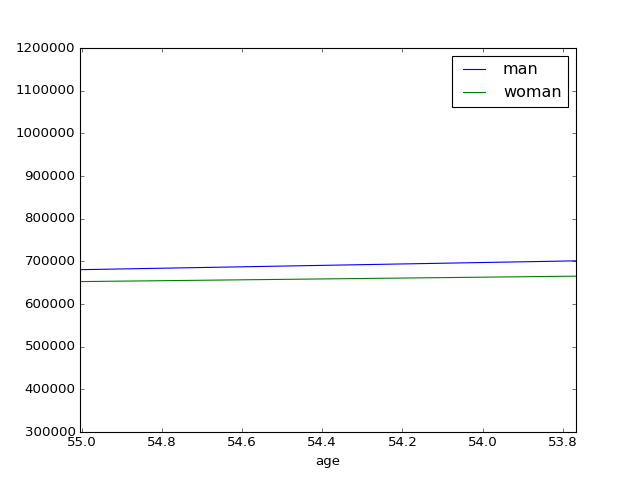

<IPython.core.display.Javascript object>


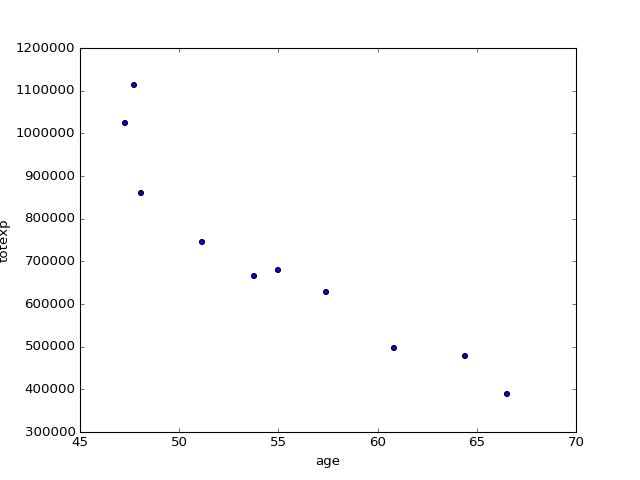

In [10]:
ax = group[group.sex == 'man'].plot(x='age', y='totexp', label='man')
group[group.sex == 'woman'].plot(x='age', y='totexp', label='woman', ax=ax)
group.plot(kind='scatter', x='age', y='totexp')

In [11]:
x = np.matrix(group.age).T
y = np.matrix(group.totexp).T
test_x = np.matrix(np.linspace(45, 70, 10)).T

# Create a linear regression model
regr = LinearRegression()
model = regr.fit(x, y)
results = model.predict(test_x)
print(results)

[[ 1030827.54710325]
 [  943049.55711449]
 [  855271.56712574]
 [  767493.57713699]
 [  679715.58714824]
 [  591937.59715948]
 [  504159.60717073]
 [  416381.61718198]
 [  328603.62719322]
 [  240825.63720447]]


<IPython.core.display.Javascript object>


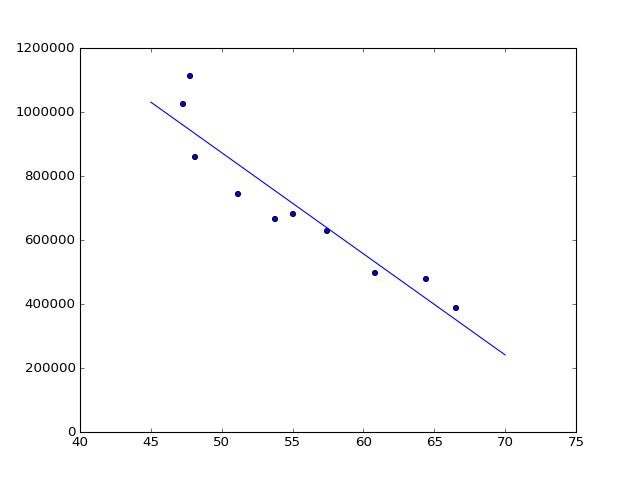

In [12]:
plt.figure()
plt.scatter(x, y)
plt.plot(test_x, results)
plt.show()